What is the primary use of algorithms and data structures in computer science? (Theoretical) (Understanding Data Structures and Algorithms)
What is the time complexity of searching for an element in an unsorted array? (Understanding) (Time Complexity of Searching in an Unsorted Array)
What is the advantage of arrays in terms of memory usage? (Remembering) (Characteristics of Arrays)
What is the disadvantage of arrays in terms of size? (Logical Reasoning) (Disadvantages of Arrays)
What is the primary difference between singly linked lists and doubly linked lists? (Pseudocode) (Doubly Linked Lists vs. Singly Linked Lists)
What is the advantage of doubly linked lists in terms of deletion? (Understanding) (Advantages of Doubly Linked Lists)
What is the time complexity of summing elements in an array using the provided pseudocode? (Pseudocode) (Pseudocode for Summing Elements in an Array)
What is the space complexity of summing elements in an array using the provided pseudocode? (Rememberin

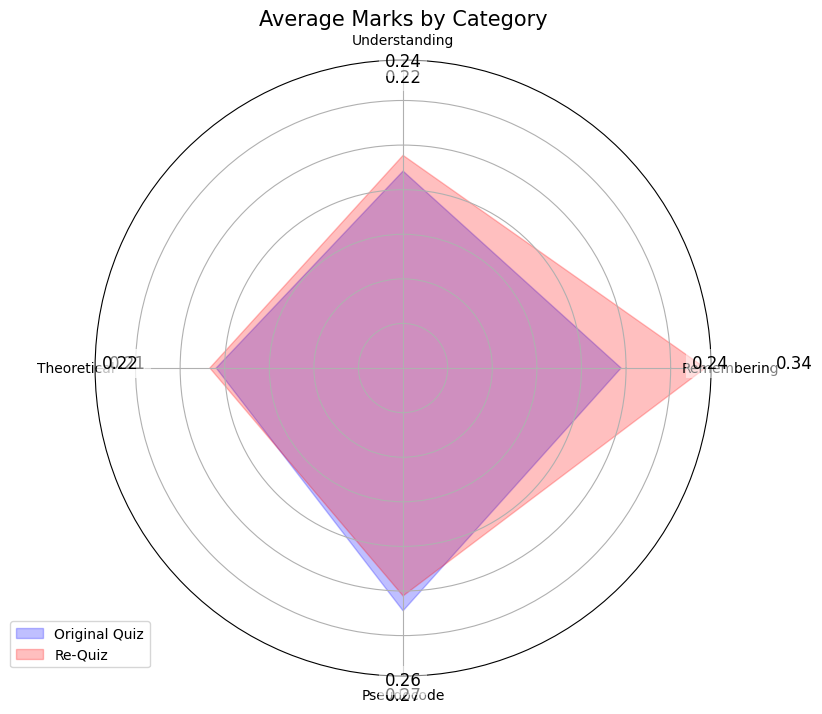

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the original quiz and test response CSV files
quiz_df = pd.read_csv('Module1_Notes_to_Quiz/quiz.csv')  # Change the file Path
test_response_df = pd.read_csv('Module2_Quiz_Analysis/Test_Responce.csv')

# Load the re-quiz and test response CSV files
re_quiz_df = pd.read_csv('Module4_Create_Re_Quiz/quiz.csv')
re_quiz_test_response_df = pd.read_csv('Module5_Re-Quiz_Analysis/Re_Quiz_Test_Response.csv')

# Function to calculate average marks for a given quiz and responses
def calculate_average_marks(quiz_df, test_response_df):
    category_marks = {
        'Remembering': {'total': 0, 'count': 0},
        'Understanding': {'total': 0, 'count': 0},
        'Theoretical': {'total': 0, 'count': 0},
        'Pseudocode': {'total': 0, 'count': 0}
    }

    # Extract the categories and correct answers
    for _, row in quiz_df.iterrows():
        question = row['Question']
        print(question)
        correct_answer = row['Correct Answer'].strip()
        
        # Find the category based on the question text
        if '(Remembering)' in question:
            category = 'Remembering'
        elif '(Understanding)' in question:
            category = 'Understanding'
        elif '(Theoretical)' in question:
            category = 'Theoretical'
        elif '(Pseudocode)' in question:
            category = 'Pseudocode'
        
        # Check the answers in test_response_df
        for _, response in test_response_df.iterrows():
            student_response = response[question].strip()
            
            # Increment the total for the category regardless of the answer
            category_marks[category]['count'] += 1
            
            # Increment the total marks if the response is correct
            if student_response == correct_answer:
                category_marks[category]['total'] += 1

    # Calculate average marks for each category
    average_marks = []
    for category in category_marks.keys():
        if category_marks[category]['count'] > 0:
            average = category_marks[category]['total'] / category_marks[category]['count']
        else:
            average = 0  # If no responses, average is 0
        average_marks.append(average)
    
    return average_marks

# Calculate average marks for the original quiz
original_quiz_avg_marks = calculate_average_marks(quiz_df, test_response_df)

# print(re_quiz_df)

# Calculate average marks for the re-quiz
re_quiz_avg_marks = calculate_average_marks(re_quiz_df, re_quiz_test_response_df)

# Prepare data for the spider chart
categories = ['Remembering', 'Understanding', 'Theoretical', 'Pseudocode']
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
original_quiz_avg_marks += original_quiz_avg_marks[:1]  # Close the circle for the original quiz
re_quiz_avg_marks += re_quiz_avg_marks[:1]  # Close the circle for the re-quiz
angles += angles[:1]  # Close the circle for angles

# Create a spider chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot the original quiz
ax.fill(angles, original_quiz_avg_marks, color='blue', alpha=0.25, label='Original Quiz')

# Plot the re-quiz
ax.fill(angles, re_quiz_avg_marks, color='red', alpha=0.25, label='Re-Quiz')

# Set labels for the categories
ax.set_yticklabels([])  # Hide radial ticks
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add labels with the average marks, spaced out
for i, value in enumerate(original_quiz_avg_marks[:-1]):
    angle_rad = angles[i]
    ax.text(angle_rad, value + 0.1, f"{value:.2f}", horizontalalignment='center', size=12, bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

for i, value in enumerate(re_quiz_avg_marks[:-1]):
    angle_rad = angles[i]
    ax.text(angle_rad, value + 0.1, f"{value:.2f}", horizontalalignment='center', size=12, bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Add a title and legend
plt.title('Average Marks by Category', size=15)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()